In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# load

## model

In [3]:
from tensorflow.keras.models import load_model

vgg = load_model('/content/drive/MyDrive/1조/DS/송현/model/10-0.83881.h5')
res = load_model('/content/drive/MyDrive/1조/DS/송현/model/resnet32_10_0.89059.h5')
xcep = load_model('/content/drive/MyDrive/1조/DS/성국/models/Xception_least_vl_nov16-2.h5')

In [4]:
vgg._name = 'vgg'
xcep._name = 'xcep'
res._name = 'res'

In [5]:
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Model

im_input = Input(shape=(275,205,3))
x1 = vgg(im_input)
x2 = xcep(im_input)
x3 = res(im_input)
output = (0.34*x1) + (0.32*x2) + (0.34*x3)
model = Model(im_input, output)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 275, 205, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg (Sequential)               (None, 6)            21007942    ['input_1[0][0]']                
                                                                                                  
 xcep (Sequential)              (None, 6)            53893422    ['input_1[0][0]']                
                                                                                                  
 tf.math.multiply (TFOpLambda)  (None, 6)            0           ['vgg[0][0]']                

In [7]:
from tensorflow.keras import optimizers
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=2e-5),
              metrics = ['acc'])

## test data

In [15]:
!unzip /content/drive/MyDrive/image_data/2000장씩/emotion_2000.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/unrest/43e963ac1393e8d19170c9ab063fbd3622b53c0e07acd4680b1f555d44772d49_여_30_불안_상업시설&점포&시장_20210126005617-003-020.jpg  
  inflating: train/unrest/43e963ac1393e8d19170c9ab063fbd3622b53c0e07acd4680b1f555d44772d49_여_30_불안_상업시설&점포&시장_20210126005617-003-023.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_공공시설&종교&의료시설_20201204102356-001-007.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_공공시설&종교&의료시설_20201204102356-001-010.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_교통&이동수단(엘리베이터 포함)_20201204102418-002-005.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_도심 환경_20201204102957-008-005.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_도심 환경_20201204102957-008-

In [16]:
train_dir = 'train'
valid_dir = 'validation'

# Confusion Matrix

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
test_generator = test_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (275, 205),
                 batch_size = 64,
                 class_mode = 'categorical')

loss, accuracy = model.evaluate(test_generator,
                                steps = 75)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 4800 images belonging to 6 classes.
75/75 [==============================] - 179s 2s/step - loss: 0.7597 - acc: 0.7267
Loss = 0.75967
Accuracy = 0.72667


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_generator = test_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (275, 205),
                 batch_size = 64,
                 class_mode = 'categorical',
                 shuffle = False)

test_generator.reset()

Y_pred = model.predict(test_generator, 75)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('\nClassification Report')
target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 4800 images belonging to 6 classes.
Confusion Matrix
[[493  44  26  51  59 127]
 [ 41 538   8  80  11 122]
 [ 12  10 755   6   6  11]
 [ 12   5   9 742  13  19]
 [ 35   8  13  75 602  67]
 [ 64 101  24 143 110 358]]
Classification Report
               precision    recall  f1-score   support

        anger       0.75      0.62      0.68       800
embarrassment       0.76      0.67      0.71       800
        happy       0.90      0.94      0.92       800
   neutrality       0.68      0.93      0.78       800
          sad       0.75      0.75      0.75       800
       unrest       0.51      0.45      0.48       800

     accuracy                           0.73      4800
    macro avg       0.73      0.73      0.72      4800
 weighted avg       0.73      0.73      0.72      4800



In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# vgg
test_generator = test_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (275, 205),
                 batch_size = 64,
                 class_mode = 'categorical',
                 shuffle = False)

test_generator.reset()

Y_pred = vgg.predict(test_generator, 75)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('\nClassification Report')
target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 4800 images belonging to 6 classes.
Confusion Matrix
[[478  47  36  57  57 125]
 [ 40 536   9  82  11 122]
 [ 17   9 748  10   9   7]
 [ 14  10  10 716  33  17]
 [ 34  10  25  86 569  76]
 [ 59 117  33 159 117 315]]

Classification Report
               precision    recall  f1-score   support

        anger       0.74      0.60      0.66       800
embarrassment       0.74      0.67      0.70       800
        happy       0.87      0.94      0.90       800
   neutrality       0.65      0.90      0.75       800
          sad       0.71      0.71      0.71       800
       unrest       0.48      0.39      0.43       800

     accuracy                           0.70      4800
    macro avg       0.70      0.70      0.69      4800
 weighted avg       0.70      0.70      0.69      4800



In [19]:
# xcep
test_generator.reset()

Y_pred = xcep.predict(test_generator, 75)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('\nClassification Report')
target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[478  63  29  62  46 122]
 [ 45 573   7  61   7 107]
 [ 28  16 716  14  10  16]
 [ 20  17   9 668  21  65]
 [ 73  20  13  75 515 104]
 [101 166  18 113  68 334]]

Classification Report
               precision    recall  f1-score   support

        anger       0.64      0.60      0.62       800
embarrassment       0.67      0.72      0.69       800
        happy       0.90      0.90      0.90       800
   neutrality       0.67      0.83      0.75       800
          sad       0.77      0.64      0.70       800
       unrest       0.45      0.42      0.43       800

     accuracy                           0.68      4800
    macro avg       0.68      0.68      0.68      4800
 weighted avg       0.68      0.68      0.68      4800



In [20]:
# res
test_generator.reset()

Y_pred = model.predict(test_generator, 75)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('\nClassification Report')
target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[493  44  26  51  59 127]
 [ 41 538   8  80  11 122]
 [ 12  10 755   6   6  11]
 [ 12   5   9 742  13  19]
 [ 35   8  13  75 602  67]
 [ 64 101  24 143 110 358]]

Classification Report
               precision    recall  f1-score   support

        anger       0.75      0.62      0.68       800
embarrassment       0.76      0.67      0.71       800
        happy       0.90      0.94      0.92       800
   neutrality       0.68      0.93      0.78       800
          sad       0.75      0.75      0.75       800
       unrest       0.51      0.45      0.48       800

     accuracy                           0.73      4800
    macro avg       0.73      0.73      0.72      4800
 weighted avg       0.73      0.73      0.72      4800



# test single images

In [13]:
hap_path = '/content/drive/MyDrive/1조/DS/성국/datasets/happy_test.jpg'
neu_path = '/content/drive/MyDrive/1조/DS/성국/datasets/neu_test.jpg'
sad_path = '/content/drive/MyDrive/1조/DS/성국/datasets/sad_test.jpg'
sad_neu_path = '/content/drive/MyDrive/1조/DS/성국/datasets/sad_neu_test.jpg'
emb_path = '/content/drive/MyDrive/1조/DS/성국/datasets/emb_test.jpg'
unr_path = '/content/drive/MyDrive/1조/DS/성국/datasets/unrest_test.jpg'
ang_path = '/content/drive/MyDrive/1조/DS/성국/datasets/anger_test.jpg'

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

def mk_img_tensor(img_path):
    img = image.load_img(img_path, target_size=(275, 205))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    print(img_tensor.shape)
    return img_tensor

In [15]:
import matplotlib.pyplot as plt

def percentage(test):
    plt.imshow(test[0])
    plt.show()
    print('anger:',  model.predict(test)[0][0])
    print('embarrassment:',  model.predict(test)[0][1])
    print('happy:',  model.predict(test)[0][2])
    print('neutrality:',  model.predict(test)[0][3])
    print('sad:',  model.predict(test)[0][4])
    print('unrest:',  model.predict(test)[0][5])

In [16]:
hap_test = mk_img_tensor(hap_path)
neu_test = mk_img_tensor(neu_path)
sad_test = mk_img_tensor(sad_path)
sad_neu_test = mk_img_tensor(sad_neu_path)
emb_test = mk_img_tensor(emb_path)
unr_test = mk_img_tensor(unr_path)
ang_test = mk_img_tensor(ang_path)

(1, 275, 205, 3)
(1, 275, 205, 3)
(1, 275, 205, 3)
(1, 275, 205, 3)
(1, 275, 205, 3)
(1, 275, 205, 3)
(1, 275, 205, 3)


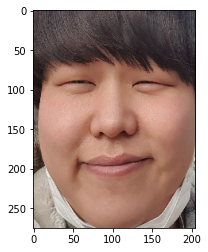

anger: 0.0025732978
embarrassment: 0.00020205745
happy: 0.9385188
neutrality: 7.085664e-05
sad: 0.049755383
unrest: 0.008879595


In [17]:
percentage(hap_test)

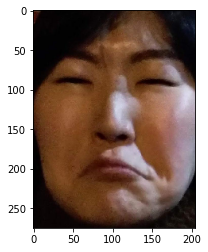

anger: 0.00087187084
embarrassment: 0.00014466526
happy: 0.00019741866
neutrality: 0.0008376923
sad: 0.99512404
unrest: 0.002824286


In [18]:
percentage(sad_test)

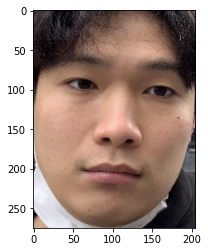

anger: 0.0038486142
embarrassment: 0.0015014034
happy: 0.0012638201
neutrality: 0.9642222
sad: 0.013469638
unrest: 0.015694387


In [19]:
percentage(neu_test)

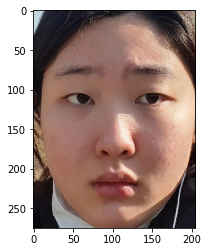

anger: 0.054387353
embarrassment: 0.11274974
happy: 0.0016497399
neutrality: 0.27859086
sad: 0.14511839
unrest: 0.4075039


In [20]:
percentage(sad_neu_test)

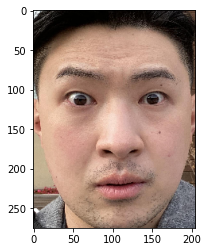

anger: 0.009057557
embarrassment: 0.8483271
happy: 6.875349e-05
neutrality: 0.0050648954
sad: 0.00046412484
unrest: 0.13701764


In [21]:
percentage(emb_test)

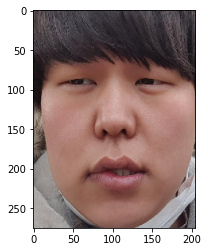

anger: 0.08270131
embarrassment: 0.01630013
happy: 0.0035851593
neutrality: 0.12497415
sad: 0.022885758
unrest: 0.74955356


In [22]:
percentage(unr_test)

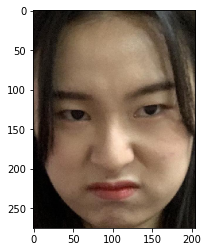

anger: 0.8671781
embarrassment: 0.0008847001
happy: 0.00083567627
neutrality: 0.003753037
sad: 0.086877264
unrest: 0.040471345


In [23]:
percentage(ang_test)